In [3]:
# TITLE
#introduction
#Web Site for Aussie Road Fatalities

In [4]:
__author__ = 'utting'
# Read the input CSV file
infile = open("Fatalities_March_2018.csv", "r")
data = []
for line in infile:
    cols = line.split(",")
    # print(cols)
    crash_id = cols[0]
    # clean up the Airport column, removing spaces
    state = cols[1].strip().replace(" ", "")
    month = cols[2].strip().replace(" ", "")
    year = cols[3].strip().replace(" ", "")
    dayweek = cols[4].strip().replace(" ", "")
    time = cols[5].strip().replace(" ", "")
    crash_type = cols[6].strip().replace(" ", "")
    bus_in = cols[7].strip().replace(" ", "")
    rig_truck_in = cols[8].strip().replace(" ", "")
    arti_truck_in = cols[9].strip().replace(" ", "")
    speed_limit = cols[10].strip().replace(" ", "")
    road_user = cols[11].strip().replace(" ", "")
    gender = cols[11].strip().replace(" ", "")
    age = cols[11].strip().replace(" ", "")
    # print(country, pop * 1.1)
    pair = (crash_id, state,month,year,dayweek,time,crash_type,bus_in,rig_truck_in,arti_truck_in,speed_limit,road_user,gender,age)
    data.append(pair)
infile.close()

In [5]:
import pandas as pd
df=pd.read_csv("Fatalities_March_2018.csv")


Crash ID                           int64
State                             object
Month                             object
Year                               int64
Dayweek                           object
Time                              object
Crash_Type                        object
Bus_Involvement                   object
Rigid_Truck_Involvement           object
Articulated_Truck_Involvement     object
Speed_Limit                        int64
Road_User                         object
Gender                            object
Age                                int64
dtype: object

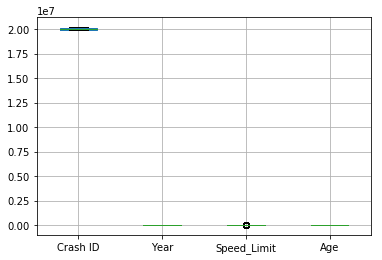

In [6]:
%matplotlib inline
df.boxplot()
df.dtypes

In [7]:
header = """
<!DOCTYPE html>
<html>
<head >
<title>Index</title>
<meta charset="utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<style>
* {
    box-sizing: border-box;
}

body {
  margin: 0;
  background-color: #D3FEFE;
  text-align: center;
}

/* Style the header */
.header {
    background-color: #f1f1f1;
    padding: 20px;
    text-align: center;
}

/* Style the top navigation bar */
.topnav {
    overflow: hidden;
    background-color: #333;
}

/* Style the topnav links */
.topnav a {
    float: left;
    display: block;
    color: #f2f2f2;
    text-align: center;
    padding: 14px 16px;
    text-decoration: none;
}

/* Change color on hover */
.topnav a:hover {
    background-color: #ddd;
    color: black;
}

/* Create three unequal columns that floats next to each other */
.column {
    float: left;
    padding: 10px;
}

/* Left and right column */
.column.side {
    width: 25%;
}

/* Middle column */
.column.middle {
    width: 50%;
}

/* Clear floats after the columns */
.row:after {
    content: "";
    display: table;
    clear: both;
}

/* Responsive layout - makes the three columns stack on top of each other instead of next to each other */
@media screen and (max-width: 600px) {
    .column.side, .column.middle {
        width: 100%;
    }
}

/* Style the footer */
.footer {
    background-color: #f1f1f1;
    padding: 10px;
    text-align: center;
    bottom: 0;
}
.container {
   height:100%;
}
</style>
</head>
<div id="container">
<body >

<div class="header">
<h1>Aussie Road Fatalities</h1>
</div>
"""

In [8]:
footer="""
<div class="footer">
  <p>&copy Nurul Amin 2019</p>
</div>

</body>
</div>
</html>
"""

In [9]:
# writing data into a .html file.
out1 = open("TypeOfClash.html", "w")
out1.write(header)
out1.write("<table border = 1>")

lines = [line.rstrip('\n') for line in open("Fatalities_March_2018.csv")]
Types = ['Single vehicle','Multiple vehicle','Pedestrian']

stn=0
out1.write("<tr><td>" + "Type Of Clash" + "</td><td>"+"Total Fatalities"+"</td></tr>")
while(stn<len(Types)):
    sum_f=int(0)
    l=1
    while(l<len(lines)):
        column=lines[l].split(',')
        a=str(Types[stn])
        b=str(column[6])
        if(a==b):
            sum_f = sum_f+1
        else:
            sum_f = sum_f
        l=l+1
    sum_f=str(sum_f)
    typ = str(Types[stn])
    stn=stn+1
    out1.write("<tr><td>" + typ +"</td><td>"+ sum_f +"</td></tr>")
out1.write("</table>")
out1.write(footer)
out1.close()

In [10]:

# writing data into a .html file.
out1 = open("TotalPerYear.html", "w")
out1.write(header)
out1.write("<table border = 1>")
lines = [line.rstrip('\n') for line in open("Fatalities_March_2018.csv")]
cal_year=1989
sum_f_old=0
out1.write("<tr><td>" + "Year" + "</td><td>" + "Total Fatalities" + "</td><td>"+"Fatalities Increased from Last year"+"</td></tr>")
while(cal_year<2019):
    sum_f=int(0)
    l=1
    while(l<len(lines)):
        column=lines[l].split(',')    
        if(cal_year==int(column[3])):
            sum_f = sum_f+1
        else:
            sum_f = sum_f
        l=l+1
    pioy=int(sum_f)-int(sum_f_old)
    sum_f_old=int(sum_f)
    pioy=str(pioy)
    cal_year=str(cal_year)
    sum_f=str(sum_f)        
    out1.write("<tr><td>" + cal_year + "</td><td>" + sum_f +"</td><td>"+ pioy +"</td></tr>")
    cal_year=int(cal_year)
    cal_year=cal_year+1
out1.write("</table>")
out1.write(footer)
out1.close()

In [11]:
# writing data into a .html file.
out1 = open("RoadUser.html", "w")
out1.write(header)
out1.write("<table border = 1>")

lines = [line.rstrip('\n') for line in open("Fatalities_March_2018.csv")]
road_User = ['Pedestrian','Passenger','Motorcycle rider','Driver','Bicyclist (includes pillion passengers)']

TotalF=48896
TotalN=0
TotalO=0
stn=0
out1.write("<tr><td>" + "Road User" + "</td><td>"+"Total Fatalities"+"</td></tr>")
while(stn<len(road_User)):
    sum_f=int(0)
    l=1
    while(l<len(lines)):
        column=lines[l].split(',')
        a=str(road_User[stn])
        b=str(column[11])
        if(a==b):
            sum_f = sum_f+1
        else:
            sum_f = sum_f
        l=l+1
    TotalN=TotalN+sum_f
    sum_f=str(sum_f)
    rdus = str(road_User[stn])
    stn=stn+1
    out1.write("<tr><td>" + rdus +"</td><td>"+ sum_f +"</td></tr>")
    TotalO=TotalF-TotalN
TotalO=str(TotalO)
out1.write("<tr><td>" + 'Others' +"</td><td>"+ TotalO +"</td></tr>")
out1.write("</table>")
out1.write(footer)
out1.close()


In [12]:
# writing data into a .html file.
out1 = open("TotalPerState.html", "w")
out1.write(header)
out1.write("<table border = 1>")

lines = [line.rstrip('\n') for line in open("Fatalities_March_2018.csv")]
states = ['SA','NT','NSW','QLD','WA','ACT','VIC','TAS']

stn=0
out1.write("<tr><td>" + "STATE" + "</td><td>"+"Total Fatalities"+"</td></tr>")
while(stn<len(states)):
    sum_f=int(0)
    l=1
    while(l<len(lines)):
        column=lines[l].split(',')
        a=str(states[stn])
        b=str(column[1])
        if(a==b):
            sum_f = sum_f+1
        else:
            sum_f = sum_f
        l=l+1
    sum_f=str(sum_f)
    st = str(states[stn])
    stn=stn+1
    out1.write("<tr><td>" + st +"</td><td>"+ sum_f +"</td></tr>")
out1.write("</table>")
out1.write(footer)
out1.close()

In [21]:
index="""



<p>This is a database website, in this website you can find Road Fatalities of Australia Full Chart and few written statistics</p>
<div class="topnav">
<a href="TotalPerState.html">Fatalities per state of Australia Full Chart</a>
<a href="RoadUser.html">Fatalities of Australia by Road User</a>
<a href="TotalPerYear.html">Fatalities of Australia by Year</a>
<a href="TypeOfClash.html">Fatalities of Australia by Type of Clash</a>
</div>
<img src="Capture.png" alt="Road Fatalities" width= "600" align="middle">
"""

In [22]:
out = open("Index.html", "w")
out.write(header)
out.write(index)
out.write(footer)
out.close()